# Impact of mutation

This notebook simulates the effect of the start of a more contagious mutation during an epidemic 

In [4]:
import numpy as np
import matplotlib.pyplot as pyplot
pyplot.rcParams["figure.figsize"]=(12,4)

In [5]:
def sir_infected_with_mutation(contacts, infection_rate, recovery_rate,mutation_start,mutation_effect, simulations=200,population=10_000_000, initialy_infected=1):
    """This function calculates SIR model and simulates impact of new mutation"""
    
    susceptiable_people=(population-initialy_infected)
    
    susceptiable = np.zeros([simulations])  #People who can be infected
    infected = np.zeros([simulations])      #Already infected
    recovered = np.zeros([simulations])     #Recovered or dead, cannot be infected again
    infection_rate_model = np.zeros([simulations])
    
    infected[0] = initialy_infected/ population          
    susceptiable[0] = susceptiable_people/population 
    
    infection_rate_mutation=infection_rate*mutation_effect  #Mutation increase the infection rate 

    for t in range(simulations-1):
        
        if t<=mutation_start:
            infection_rate_model[t]=infection_rate
        else:
            infection_rate_model[t]=infection_rate_mutation
            
        infected[t+1]=infected[t]+infected[t]*contacts*infection_rate_model[t]*susceptiable[t]-recovery_rate*infected[t]
        susceptiable[t+1]=susceptiable[t]-contacts*infection_rate_model[t]*susceptiable[t]*infected[t]
        recovered[t+1]=recovered[t]+recovery_rate*infected[t]
            
    pyplot.plot(infected,label=f"Recovery rate: {recovery_rate}, contact rate: {contacts}")
    pyplot.axvline(mutation_start,color="black",linestyle="dotted")
    pyplot.title(f"Mutation that is {mutation_effect} times more infectible and comes at day number {mutation_start}")
    pyplot.show()
            

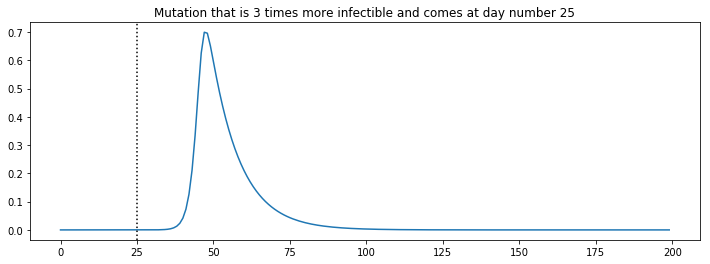

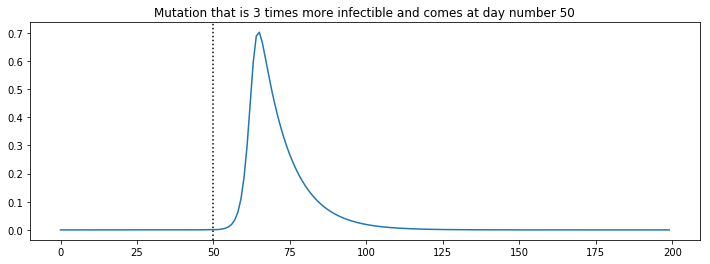

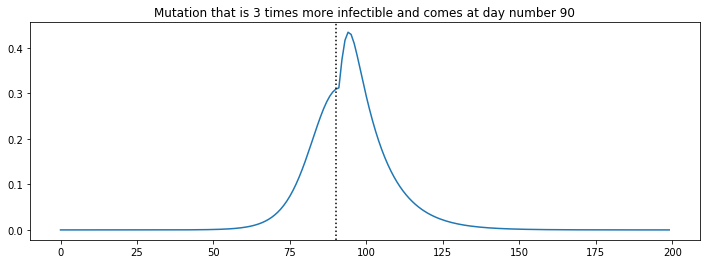

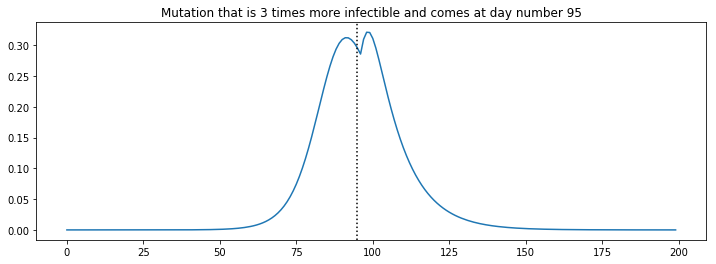

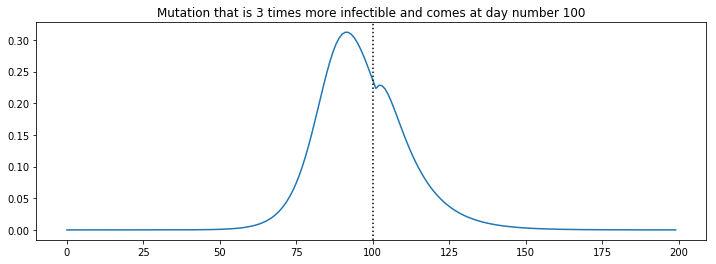

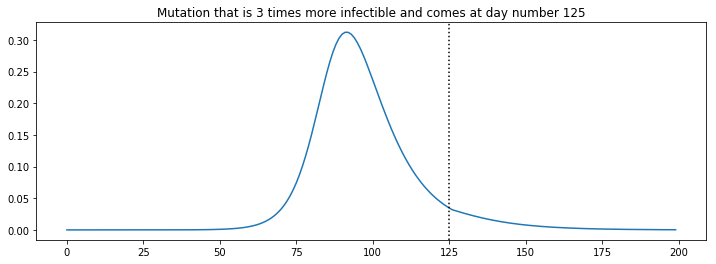

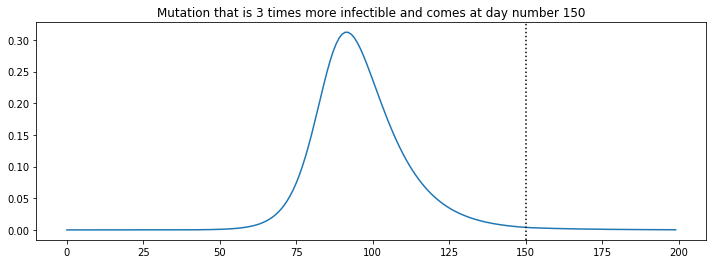

In [6]:
#Parameters

different_mutation_starts = [25,50,90,95, 100,125,150]   #Different time of arrival of more contagious mutation

contacts= 3            #How many contacts per day has an average person T
infection_rate=0.10    #Probability of getting infected with contact with an infected person T
recovery_rate = 0.1    #Rate of recovery   

mutation_effect=3      #How many times a new mutation is more contagious 

for mutation_start in different_mutation_starts:
    sir_infected_with_mutation(contacts, infection_rate, recovery_rate,mutation_start,mutation_effect, simulations=200,population=10_000_000, initialy_infected=1)

The graphs show an interesting impact of the arrival of a more contagious mutation during the epidemic:



1) If the mutation comes early, the wave of infected will come sooner and there will be a significantly more infected, but also the epidemy will disappear faster.

2) If it comes in a peak, then it changes the development of the epidemic by accelerating the increase or turning the decrease into an increase.

3) If it comes late, then the mutation has almost no effect on the number of infected and a path of the epidemy